In [87]:
import pandas as pd                       # importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
file = pd.read_csv("marketing_customer_analysis.csv") # readind the data for onward analyses

In [89]:
#file.dtypes             # checking the data types to see list of objects and numeric values for insight

In [90]:
numerical = file.select_dtypes(np.number) # extracting numerical data from the main data for analyses
#numerical

In [91]:
categorical = file.select_dtypes(object)     # extracting categorical data
#categorical

In [92]:
#numerical.head()   # headings of the numerical data

In [93]:
numerical.describe().T # transposing the data for further analyses especially with respect to correlation 

count          mean           std   
Unnamed: 0                     10910.0   5454.500000   3149.590053  \
Customer Lifetime Value        10910.0   8018.241094   6885.081434   
Income                         10910.0  37536.284785  30359.195670   
Monthly Premium Auto           10910.0     93.196059     34.442532   
Months Since Last Claim        10277.0     15.149071     10.080349   
Months Since Policy Inception  10910.0     48.091934     27.940675   
Number of Open Complaints      10277.0      0.384256      0.912457   
Number of Policies             10910.0      2.979193      2.399359   
Total Claim Amount             10910.0    434.888330    292.180556   

                                       min          25%           50%   
Unnamed: 0                        0.000000  2727.250000   5454.500000  \
Customer Lifetime Value        1898.007675  4014.453113   5771.147235   
Income                            0.000000     0.000000  33813.500000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since Policy Inception     0.000000    24.000000     48.000000   
Number of Open Complaints         0.000000     0.000000      0.000000   
Number of Policies                1.000000     1.000000      2.000000   
Total Claim Amount                0.099007   271.082527    382.564630   

                                        75%           max  
Unnamed: 0                      8181.750000  10909.000000  
Customer Lifetime Value         8992.779137  83325.381190  
Income                         62250.750000  99981.000000  
Monthly Premium Auto             109.000000    298.000000  
Months Since Last Claim           23.000000     35.000000  
Months Since Policy Inception     71.000000     99.000000  
Number of Open Complaints          0.000000      5.000000  
Number of Policies                 4.000000      9.000000  
Total Claim Amount               547.200000   2893.239678

In [94]:
sns.displot(numerical['Customer Lifetime Value']) # distribution graph for 'Customer Lifetime Value' in view of the presence of errors
#plt.show()

In [95]:
sns.displot(numerical['Total Claim Amount'])    # distribution for 'Total Claim Amount'
#plt.show()

In [96]:
sns.displot(numerical["Monthly Premium Auto"]) # distribution for 'Monthly Premium Auto'
#plt.show

<Axes: >

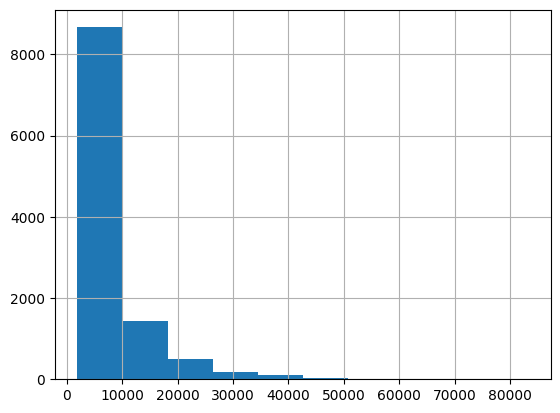

In [97]:
numerical['Customer Lifetime Value'].hist()      # histogrm for 'Customer Lifetime Value'
#plt.show()

In [98]:
numerical["Total Claim Amount"].hist()                    # histogrm for 'Total Claim Amount'
#plt.show

<Axes: >

In [99]:
sns.boxplot(x=numerical['Customer Lifetime Value'])  # boxplot for the assessment of errors in the data using the upper and lower limits as thresholds for determining outliers
#plt.show()

<Axes: xlabel='Customer Lifetime Value'>

In [100]:
iqr = np.percentile(numerical['Customer Lifetime Value'],75) - np.percentile(numerical['Customer Lifetime Value'],25)
upper_limit = np.percentile(numerical['Customer Lifetime Value'],75) + 0.44*iqr
lower_limit = np.percentile(numerical['Customer Lifetime Value'],25) - 0.00045*iqr # finding upper and lower limits to used in refining the results

In [101]:
iqr


4978.326024

In [102]:
upper_limit

11183.24258756

In [103]:
lower_limit

4012.2128662892

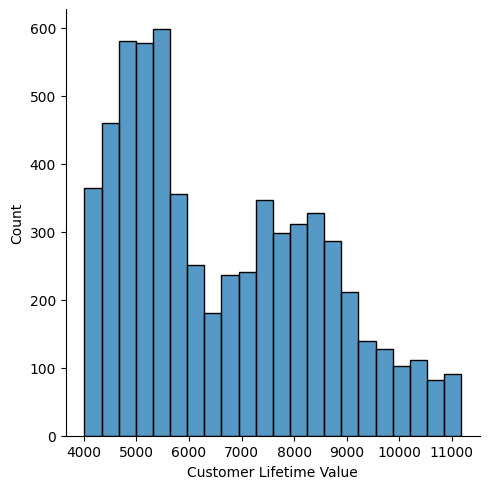

In [104]:
numerical1 = numerical[(numerical['Customer Lifetime Value']>lower_limit) & (numerical['Customer Lifetime Value']<upper_limit)].copy()
sns.displot(numerical1['Customer Lifetime Value'])
#plt.show()   # applying the result to determine if the data can is normally distributed after cleaning; but not so good

In [105]:
sns.boxplot(x=numerical['Total Claim Amount'])    # boxplot for 'Total Claim Amount'
#plt.show()

<Axes: xlabel='Total Claim Amount'>

In [106]:
iqr = np.percentile(numerical['Total Claim Amount'],75) - np.percentile(numerical['Total Claim Amount'],25)
upper_limit = np.percentile(numerical['Total Claim Amount'],75) + 0.9*iqr
lower_limit = np.percentile(numerical['Total Claim Amount'],25) - 0.51*iqr   # same as above, but for 'Total Claim Amount'

In [107]:
iqr

276.11747325000005

In [108]:
upper_limit

795.705725925

In [109]:
lower_limit

130.26261539249998

In [110]:
numerical1 = numerical[(numerical['Total Claim Amount']>lower_limit) & (numerical['Total Claim Amount']<upper_limit)].copy()
sns.displot(numerical1['Total Claim Amount'])   # normality not so good
#plt.show()

In [111]:
numerical1 = numerical.drop("Total Claim Amount", axis = 1) # 'Total Claim Amount' dropped from DataFrame in order to use only the features alone for further nalyses and prediction
#numerical1

In [112]:
correlations_matrix = numerical.corr()     # correlation matrix to see pairs that influence each other
#correlations_matrix

In [113]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation. with black showing the least correlated pairs. Correlation here is very low for all except self correlated pairs 
#plt.show()

<Axes: >

# Splitting and Scaling he Data

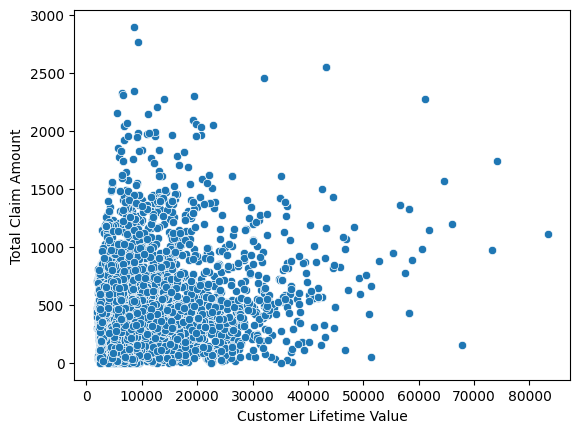

In [114]:
sns.scatterplot(x=numerical['Customer Lifetime Value'], y=numerical['Total Claim Amount'], data = file)
plt.show()

In [115]:
from sklearn.preprocessing import MinMaxScaler # splitting X and y
from sklearn.preprocessing import StandardScaler

y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [116]:
X_num

Unnamed: 0  Customer Lifetime Value  Income  Monthly Premium Auto   
0               0              4809.216960   48029                    61  \
1               1              2228.525238       0                    64   
2               2             14947.917300   22139                   100   
3               3             22332.439460   49078                    97   
4               4              9025.067525   23675                   117   
...           ...                      ...     ...                   ...   
10905       10905             15563.369440       0                   253   
10906       10906              5259.444853   61146                    65   
10907       10907             23893.304100   39837                   201   
10908       10908             11971.977650   64195                   158   
10909       10909              6857.519928       0                   101   

       Months Since Last Claim  Months Since Policy Inception   
0                          7.0                             52  \
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       Number of Open Complaints  Number of Policies  
0                            0.0                   9  
1                            0.0                   1  
2                            0.0                   2  
3                            0.0                   2  
4                            NaN                   7  
...                          ...                 ...  
10905                        NaN                   7  
10906                        0.0                   6  
10907                        0.0                   2  
10908                        4.0                   6  
10909                        0.0                   3  

[10910 rows x 8 columns]

In [117]:
transformer = MinMaxScaler().fit(X_num) # normalising numerical
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(10910, 8)


Unnamed: 0  Customer Lifetime Value    Income  Monthly Premium Auto   
0        0.000000                 0.035752  0.480381              0.000000  \
1        0.000092                 0.004059  0.000000              0.012658   
2        0.000183                 0.160264  0.221432              0.164557   
3        0.000275                 0.250953  0.490873              0.151899   
4        0.000367                 0.087527  0.236795              0.236287   
...           ...                      ...       ...                   ...   
10905    0.999633                 0.167823  0.000000              0.810127   
10906    0.999725                 0.041281  0.611576              0.016878   
10907    0.999817                 0.270122  0.398446              0.590717   
10908    0.999908                 0.123717  0.642072              0.409283   
10909    1.000000                 0.060907  0.000000              0.168776   

       Months Since Last Claim  Months Since Policy Inception   
0                     0.200000                       0.525253  \
1                     0.085714                       0.262626   
2                     0.971429                       0.313131   
3                     0.285714                       0.030303   
4                          NaN                       0.313131   
...                        ...                            ...   
10905                      NaN                       0.404040   
10906                 0.200000                       0.686869   
10907                 0.314286                       0.636364   
10908                 0.000000                       0.272727   
10909                 0.885714                       0.010101   

       Number of Open Complaints  Number of Policies  
0                            0.0               1.000  
1                            0.0               0.000  
2                            0.0               0.125  
3                            0.0               0.125  
4                            NaN               0.750  
...                          ...                 ...  
10905                        NaN               0.750  
10906                        0.0               0.625  
10907                        0.0               0.125  
10908                        0.8               0.625  
10909                        0.0               0.250  

[10910 rows x 8 columns]

In [118]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr()

Unnamed: 0  Customer Lifetime Value    Income   
Unnamed: 0                       1.000000                 0.001355  0.008910  \
Customer Lifetime Value          0.001355                 1.000000  0.028306   
Income                           0.008910                 0.028306  1.000000   
Monthly Premium Auto             0.000863                 0.403069 -0.009788   
Months Since Last Claim          0.007958                 0.016052 -0.023814   
Months Since Policy Inception    0.012795                 0.016960 -0.005903   
Number of Open Complaints        0.007325                -0.032243  0.007163   
Number of Policies               0.002319                 0.016024 -0.009960   

                               Monthly Premium Auto  Months Since Last Claim   
Unnamed: 0                                 0.000863                 0.007958  \
Customer Lifetime Value                    0.403069                 0.016052   
Income                                    -0.009788                -0.023814   
Monthly Premium Auto                       1.000000                 0.008744   
Months Since Last Claim                    0.008744                 1.000000   
Months Since Policy Inception              0.018953                -0.039318   
Number of Open Complaints                 -0.010350                 0.002246   
Number of Policies                        -0.020505                 0.007678   

                               Months Since Policy Inception   
Unnamed: 0                                          0.012795  \
Customer Lifetime Value                             0.016960   
Income                                             -0.005903   
Monthly Premium Auto                                0.018953   
Months Since Last Claim                            -0.039318   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                           0.004376   
Number of Policies                                 -0.009123   

                               Number of Open Complaints  Number of Policies  
Unnamed: 0                                      0.007325            0.002319  
Customer Lifetime Value                        -0.032243            0.016024  
Income                                          0.007163           -0.009960  
Monthly Premium Auto                           -0.010350           -0.020505  
Months Since Last Claim                         0.002246            0.007678  
Months Since Policy Inception                   0.004376           -0.009123  
Number of Open Complaints                       1.000000            0.004098  
Number of Policies                              0.004098            1.000000

In [119]:
transformer = StandardScaler().fit(X_num) # alternative method for normalising the data
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(10910, 8)


Unnamed: 0  Customer Lifetime Value    Income  Monthly Premium Auto   
0       -1.731892                -0.466105  0.345635             -0.934819  \
1       -1.731575                -0.840946 -1.236462             -0.847713   
2       -1.731257                 1.006523 -0.507194              0.197554   
3       -1.730940                 2.079112  0.380189              0.110448   
4       -1.730622                 0.146240 -0.456597              0.691152   
...           ...                      ...       ...                   ...   
10905    1.730622                 1.095916 -1.236462              4.639940   
10906    1.730940                -0.400710  0.777715             -0.818678   
10907    1.731257                 2.305825  0.075787              3.130109   
10908    1.731575                 0.574273  0.878150              1.881595   
10909    1.731892                -0.168593 -1.236462              0.226589   

       Months Since Last Claim  Months Since Policy Inception   
0                    -0.808451                       0.139877  \
1                    -1.205282                      -0.790709   
2                     1.870158                      -0.611750   
3                    -0.510828                      -1.613919   
4                          NaN                      -0.611750   
...                        ...                            ...   
10905                      NaN                      -0.289625   
10906                -0.808451                       0.712545   
10907                -0.411620                       0.533586   
10908                -1.502905                      -0.754917   
10909                 1.572535                      -1.685503   

       Number of Open Complaints  Number of Policies  
0                      -0.421143            2.509455  
1                      -0.421143           -0.824922  
2                      -0.421143           -0.408125  
3                      -0.421143           -0.408125  
4                            NaN            1.675860  
...                          ...                 ...  
10905                        NaN            1.675860  
10906                  -0.421143            1.259063  
10907                  -0.421143           -0.408125  
10908                   3.962838            1.259063  
10909                  -0.421143            0.008672  

[10910 rows x 8 columns]

In [120]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

count          mean       std       min   
Unnamed: 0                     10910.0  4.168170e-17  1.000046 -1.731892  \
Customer Lifetime Value        10910.0 -1.426296e-16  1.000046 -0.888953   
Income                         10910.0  4.949702e-17  1.000046 -1.236462   
Monthly Premium Auto           10910.0  1.048555e-16  1.000046 -0.934819   
Months Since Last Claim        10277.0  6.360799e-17  1.000049 -1.502905   
Months Since Policy Inception  10910.0  1.107170e-16  1.000046 -1.721295   
Number of Open Complaints      10277.0  5.807686e-17  1.000049 -0.421143   
Number of Policies             10910.0  5.731234e-17  1.000046 -0.824922   

                                    25%       50%       75%        max  
Unnamed: 0                    -0.865946  0.000000  0.865946   1.731892  
Customer Lifetime Value       -0.581543 -0.326386  0.141550  10.938228  
Income                        -1.236462 -0.122630  0.814106   2.056958  
Monthly Premium Auto          -0.731573 -0.296045  0.458871   5.946524  
Months Since Last Claim       -0.907659 -0.113997  0.778873   1.969366  
Months Since Policy Inception -0.862293 -0.003290  0.819920   1.822089  
Number of Open Complaints     -0.421143 -0.421143 -0.421143   5.058833  
Number of Policies            -0.824922 -0.408125  0.425469   2.509455